In [149]:
import os
from pathlib import Path, PureWindowsPath
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()
from pandas import datetime
from datetime import timedelta
from time import time
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
register_matplotlib_converters()
from statsmodels.tsa.arima.model import ARIMA

/var/folders/25/ys3kvvh94qz9hdnmxh9q884h0000gn/T/ipykernel_98754/491514035.py:12: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


## Import Data

In [3]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [8]:
path = "/Users/williamearley/Quarter 5/Capstone/Data"

In [9]:
df_train = pd.read_csv(os.path.join(path, 'train.csv'))
df_transaction = pd.read_csv(os.path.join(path, 'transactions.csv'))
df_holidays = pd.read_csv(os.path.join(path, 'holidays_events.csv'))
df_oil = pd.read_csv(os.path.join(path, 'oil.csv'))
df_stores = pd.read_csv(os.path.join(path, 'stores.csv'))
df_test = pd.read_csv(os.path.join(path, 'test.csv'))

## General Exploration

In [10]:
df_train.head(3)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0


In [11]:
df_transaction.head(3)

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358


In [12]:
df_test.head(3)

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2


In [13]:
df_train['date'].max()

'2017-08-15'

In [14]:
df_test['date'].max()

'2017-08-31'

In [15]:
df_train['date'].min()

'2013-01-01'

In [16]:
df_test['date'].min()

'2017-08-16'

Looks like the train data spans from Jan 2013 to August 2017, whereas the test data only covers the last two weeks of August 2017.

In [17]:
# Converting all date columns to datetime

df_train['date'] = pd.to_datetime(df_train['date'])
df_test['date'] = pd.to_datetime(df_test['date'])

## First pass of the SARIMA model
### This failed

In [18]:
from pmdarima import auto_arima

In [19]:
# Converting the data column to a numeric value so it can work with SARIMA

df_train['date_numeric'] = df_train['date'].astype(int)  # Convert timestamp to numeric
df_train.set_index('date_numeric', inplace=True)

In [20]:
df_train.head(3)

,id,date,store_nbr,family,sales,onpromotion
date_numeric,,,,,,
1356998400000000000,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1356998400000000000,1,2013-01-01,1,BABY CARE,0.0,0
1356998400000000000,2,2013-01-01,1,BEAUTY,0.0,0


In [21]:
y = df_train['sales'].values

In [22]:
model = auto_arima(y, m = 7)

KeyboardInterrupt: 

## Fit SARIMA Model

## Applying what was for the ice cream data to our data, this video: https://www.youtube.com/watch?v=y8opUEd05Dg&ab_channel=ritvikmath

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()

In [24]:
df_train.head(3)

,id,date,store_nbr,family,sales,onpromotion
date_numeric,,,,,,
1356998400000000000,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1356998400000000000,1,2013-01-01,1,BABY CARE,0.0,0
1356998400000000000,2,2013-01-01,1,BEAUTY,0.0,0


In [25]:
df_train_only_sales = df_train.groupby('date')['sales'].sum().reset_index()

In [26]:
# Grouping all sales for each day together, not caring about store_nbr, promotion, etc. 
df_train_only_sales.head(5)

,date,sales
0,2013-01-01,2511.618999
1,2013-01-02,496092.417944
2,2013-01-03,361461.231124
3,2013-01-04,354459.677093
4,2013-01-05,477350.121229


In [27]:
df_train_only_sales['date'] = pd.to_datetime(df_train_only_sales.date)

In [28]:
# Setting the date as the index

df_train_only_sales.set_index('date', inplace=True)

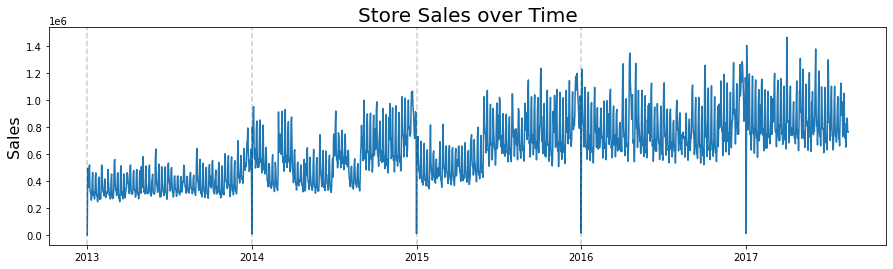

In [29]:
# Plotting train data

plt.figure(figsize=(15,4))
plt.plot(df_train_only_sales.sales)
plt.title('Store Sales over Time', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(2013,2017):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

## Using first difference with our data

In [33]:
# We see from the plot above that in general, sales are increasing over time, so we want to employ some
# stationarity, taking the first difference of this series.

# take first difference
first_diffs = df_train_only_sales.sales.values[1:] - df_train_only_sales.sales.values[:-1]
first_diffs = np.concatenate([first_diffs, [0]])

In [34]:
df_train_only_sales.head(5)

,sales
date,
2013-01-01,2511.618999
2013-01-02,496092.417944
2013-01-03,361461.231124
2013-01-04,354459.677093
2013-01-05,477350.121229


In [35]:
df_train_only_sales['FirstDifference'] = first_diffs

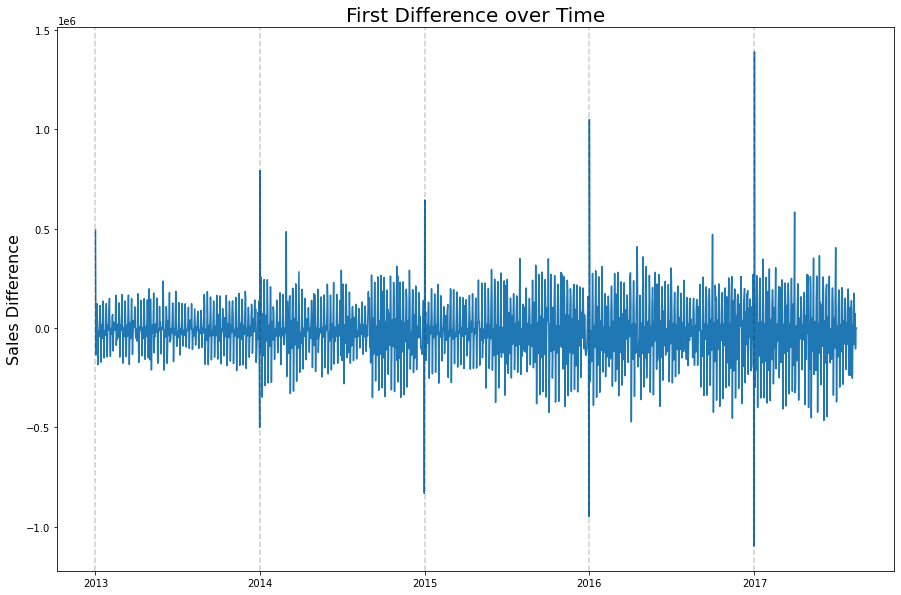

In [36]:
plt.figure(figsize=(15,10))
plt.plot(df_train_only_sales.FirstDifference)
plt.title('First Difference over Time', fontsize=20)
plt.ylabel('Sales Difference', fontsize=16)
for year in range(2013,2018):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

## ACF of first difference

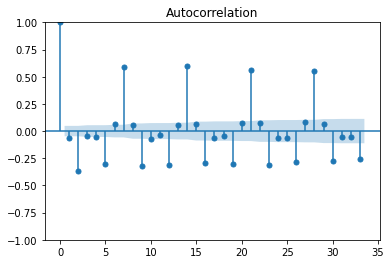

In [37]:
acf_plot = plot_acf(df_train_only_sales.FirstDifference)

## PACF of first difference

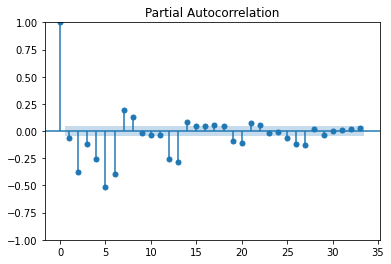

In [38]:
pacf_plot = plot_pacf(df_train_only_sales.FirstDifference)

In [39]:
## The ACF and PACF tell us important information here as there are several strong variations on different
## lags outside of the error bars. 

## AR Model

In [43]:
sales_train.head(3)

,sales
date,
2013-01-01,2511.618999
2013-01-02,496092.417944
2013-01-03,361461.231124


In [42]:
sales_train = df_train_only_sales.drop(columns=['FirstDifference'])

In [44]:
sales_train = sales_train['sales'].squeeze()

In [46]:
# infer frequency of data
sales_train = sales_train.asfreq(pd.infer_freq(sales_train.index))

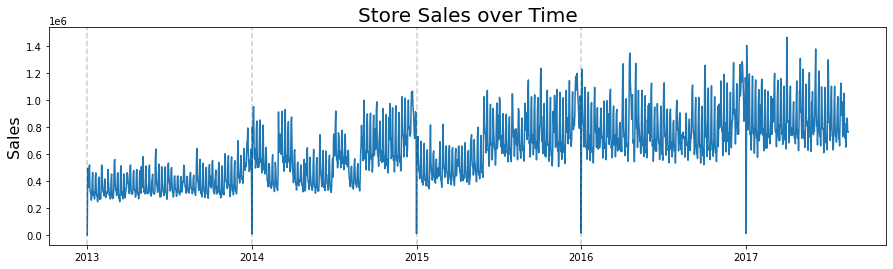

In [32]:
plt.figure(figsize=(15,4))
plt.plot(df_train_only_sales.sales)
plt.title('Store Sales over Time', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(2013,2017):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

## ACF - Autocorrelation Function

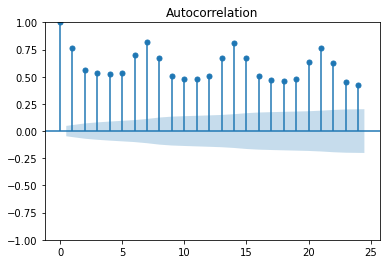

In [30]:
# The shaded area is the error so anything above it is significant, we see strong correlation in 
# months 2, 7, 14, and 21
acf_plot = plot_acf(df_train_only_sales.sales, lags=24)

## PACF - Partial Autocorrelation Function

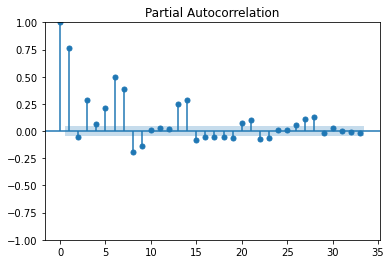

In [31]:
# We have strong lags here at 1, 6, 7, 8, 13, and 14.
pacf_plot = plot_pacf(df_train_only_sales.sales)

### We see strong spikes at 1, 2, 6, 7, etc.

## Getting training and test sets

In [146]:
sales_train

date
2013-01-01      2511.618999
2013-01-02    496092.417944
2013-01-03    361461.231124
2013-01-04    354459.677093
2013-01-05    477350.121229
                  ...      
2017-08-11    826373.722022
2017-08-12    792630.535079
2017-08-13    865639.677471
2017-08-14    760922.406081
2017-08-15    762661.935939
Freq: D, Name: sales, Length: 1688, dtype: float64

In [226]:
sales_train.index[1]

Timestamp('2013-01-02 00:00:00', freq='D')

In [55]:
train_end = datetime(2016,12,31)
test_end = datetime(2017,12,31)

train_data = sales_train[:train_end]
test_data = sales_train[train_end + timedelta(days=1):test_end]

## Fitting the AR model

In [77]:
# create the model
# choosing a lag 13 model here because there were 13(ish) lags in the PACf graph (above) 
## that were above the error band
model = ARIMA(train_data, order=(13,0,0))

In [78]:
# fit the model
start = time()
model_fit = model.fit()
end = time()
print('Model Fitting Time:', end - start)

Model Fitting Time: 3.389370918273926


In [79]:
# summary of model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                 1461
Model:                ARIMA(13, 0, 0)   Log Likelihood              -18686.412
Date:                Wed, 31 Jan 2024   AIC                          37402.824
Time:                        12:45:06   BIC                          37482.127
Sample:                    01-01-2013   HQIC                         37432.406
                         - 12-31-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.036e+05   2.52e-09    2.4e+14      0.000    6.04e+05    6.04e+05
ar.L1          0.6010      0.014     43.612      0.000       0.574       0.628
ar.L2         -0.0507      0.024     -2.110      0.0

### Interpreting the results from above, because the P value for lag 1, 2, and 3 are all very small (close to zero), we can conclude that they are all significant and we want to continue to include them.

In [80]:
# get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [81]:
# get the predictions and residuals
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data - predictions

### Evaluating how we did

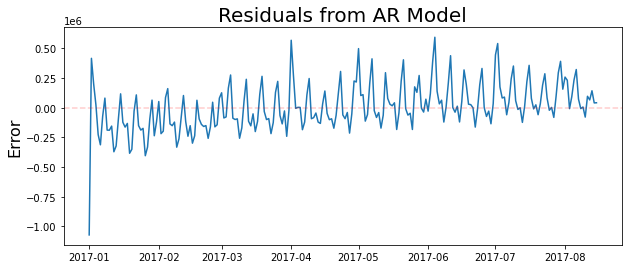

In [82]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

Text(0, 0.5, 'Sales')

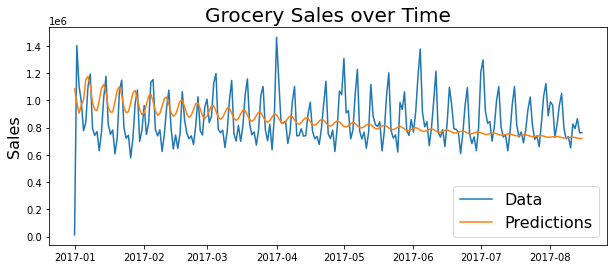

In [83]:
plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Grocery Sales over Time', fontsize=20)
plt.ylabel('Sales', fontsize=16)

In [84]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/test_data)),4))

Mean Absolute Percent Error: 0.5562


In [85]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 199474.60983972094


### These results are not good, let's see if we can capture more of the nuance in the data using a more complex model

## MA Model

In [150]:
from statsmodels.tsa.stattools import acf, pacf

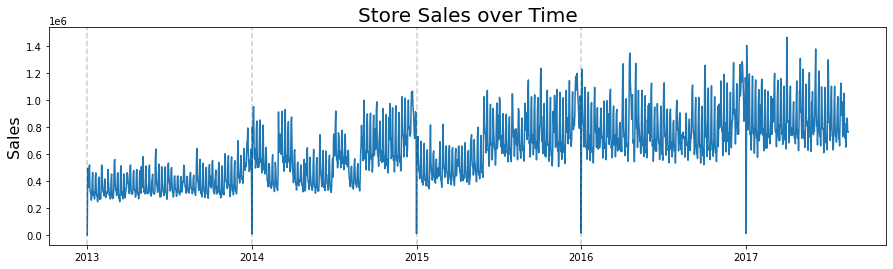

In [87]:
plt.figure(figsize=(15,4))
plt.plot(df_train_only_sales.sales)
plt.title('Store Sales over Time', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(2013,2017):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

### For the MA model we need data generated around a specific mean, so we will use the first difference here. 

In [88]:
# We see from the plot above that in general, sales are increasing over time, so we want to employ some
# stationarity, taking the first difference of this series.

# take first difference
first_diffs = df_train_only_sales.sales.values[1:] - df_train_only_sales.sales.values[:-1]
first_diffs = np.concatenate([first_diffs, [0]])

In [89]:
df_train_only_sales['FirstDifference'] = first_diffs

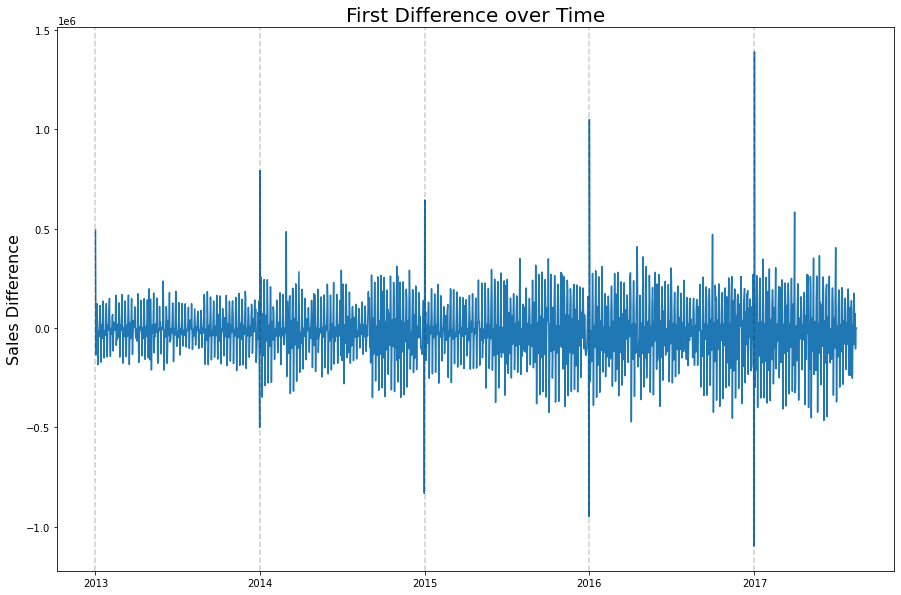

In [90]:
plt.figure(figsize=(15,10))
plt.plot(df_train_only_sales.FirstDifference)
plt.title('First Difference over Time', fontsize=20)
plt.ylabel('Sales Difference', fontsize=16)
for year in range(2013,2018):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [91]:
# Will be used to calculate correlation
def calc_corr(series, lag):
    return pearsonr(series[:-lag], series[lag:])[0]

In [164]:
df_train_only_sales.head(4)

,sales,FirstDifference
date,,
2013-01-01,2511.618999,493580.798945
2013-01-02,496092.417944,-134631.186820
2013-01-03,361461.231124,-7001.554031
2013-01-04,354459.677093,122890.444136


In [227]:
# Need to make a series using the first difference
series = df_train_only_sales['FirstDifference']

## ACF

<BarContainer object of 15 artists>

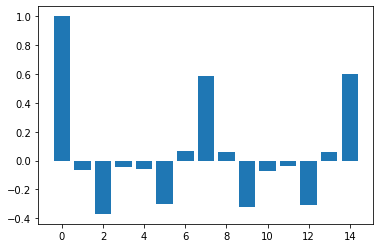

In [95]:
acf_vals = acf(series)
num_lags = 15
plt.bar(range(num_lags), acf_vals[:num_lags])

### The ACF is used to tell you about the moving average (MA) part of an ARMA model, we see larger values in lags 2, 5, 7, 9, 12 and 14. So maybe we will set the "order" of the process to 12 or 14.

## PACF

<BarContainer object of 25 artists>

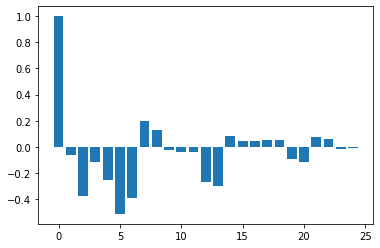

In [96]:
pacf_vals = pacf(series)
num_lags = 25
plt.bar(range(num_lags), pacf_vals[:num_lags])

## Train and test data

In [229]:
# infer frequency of data
series = series.asfreq(pd.infer_freq(series.index))

In [230]:
train_end = datetime(2016,12,31)
test_end = datetime(2017,8,15)

train_data = series[:train_end]
test_data = series[train_end + timedelta(days=1):test_end]

## Fit ARIMA model

In [231]:
# create the model
model = ARIMA(train_data, order=(0,0,14))

In [232]:
model_fit = model.fit()

In [233]:
# summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:        FirstDifference   No. Observations:                 1461
Model:                ARIMA(0, 0, 14)   Log Likelihood              -19008.891
Date:                Wed, 31 Jan 2024   AIC                          38049.782
Time:                        16:06:41   BIC                          38134.372
Sample:                    01-01-2013   HQIC                         38081.336
                         - 12-31-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5689   1782.892      0.004      0.997   -3487.836    3500.973
ma.L1         -0.3285      0.026    -12.539      0.000      -0.380      -0.277
ma.L2         -0.3741      0.039     -9.580      0.0

### Predictions

In [238]:
test_data

2017-01-01    1.390224e+06
2017-01-02   -2.979293e+05
2017-01-03   -1.142836e+05
2017-01-04   -2.124725e+05
2017-01-05    6.197928e+04
                  ...     
2017-08-11   -3.374319e+04
2017-08-12    7.300914e+04
2017-08-13   -1.047173e+05
2017-08-14    1.739530e+03
2017-08-15    0.000000e+00
Freq: D, Name: FirstDifference, Length: 227, dtype: float64

In [234]:
#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [235]:
#get the predictions and residuals
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)

In [236]:
residuals = test_data - predictions

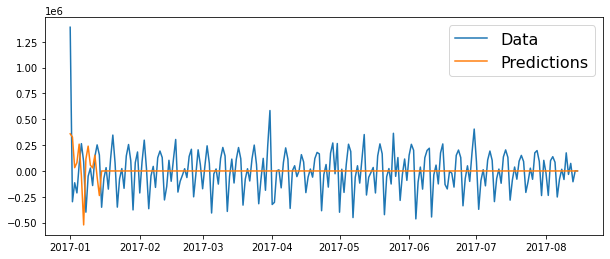

In [240]:
plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

### For all the test data...this went pretty bad, but for just the first 15 days it was solid, something to build on

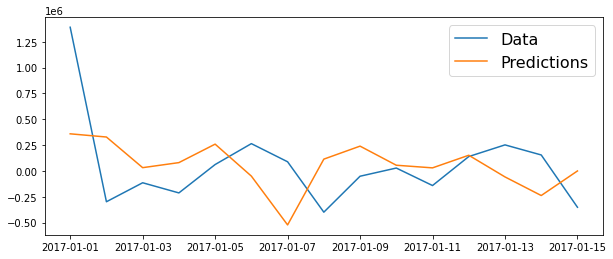

In [243]:
plt.figure(figsize=(10,4))

plt.plot(test_data[:15])
plt.plot(predictions[:15])

plt.legend(('Data', 'Predictions'), fontsize=16)

In [241]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/test_data)),4))

Mean Absolute Percent Error: inf


# Entire SARIMAX model

In [244]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [245]:
train_end = datetime(2016,12,31)
test_end = datetime(2017,12,31)

train_data = sales_train[:train_end]
test_data = sales_train[train_end + timedelta(days=1):test_end]

In [248]:
my_order = (13,0,14)
my_seasonal_order = (1, 0, 1, 12)
# define model
model = SARIMAX(train_data, order=my_order)

In [249]:
#fit the model
start = time()
model_fit = model.fit()
end = time()
print('Model Fitting Time:', end - start)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           28     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.42263D+01    |proj g|=  1.19792D+02


 This problem is unconstrained.



At iterate    5    f=  1.34363D+01    |proj g|=  1.22015D+00

At iterate   10    f=  1.29411D+01    |proj g|=  3.77802D-01

At iterate   15    f=  1.28511D+01    |proj g|=  2.03180D-01

At iterate   20    f=  1.27610D+01    |proj g|=  1.36034D-01

At iterate   25    f=  1.27443D+01    |proj g|=  2.85879D-01

At iterate   30    f=  1.27358D+01    |proj g|=  1.55918D-01

At iterate   35    f=  1.27345D+01    |proj g|=  2.98871D-01

At iterate   40    f=  1.27292D+01    |proj g|=  1.90441D-01

At iterate   45    f=  1.27282D+01    |proj g|=  3.76181D-01


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.27274D+01    |proj g|=  5.71750D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   28     50     54      1     0     0   5.717D-02   1.273D+01
  F =   12.727438623788188     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model Fitting Time: 9.999525308609009


In [250]:
#summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                 1461
Model:             SARIMAX(13, 0, 14)   Log Likelihood              -18594.788
Date:                Wed, 31 Jan 2024   AIC                          37245.576
Time:                        16:15:51   BIC                          37393.608
Sample:                    01-01-2013   HQIC                         37300.796
                         - 12-31-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1194      0.149      0.801      0.423      -0.173       0.412
ar.L2          0.0906      0.130      0.696      0.486      -0.164       0.346
ar.L3         -0.6529      0.130     -5.005      0.0

In [251]:
#get the predictions and residuals
predictions = model_fit.forecast(len(test_data))
predictions = pd.Series(predictions, index=test_data.index)
residuals = test_data - predictions

Text(0, 0.5, 'Error')

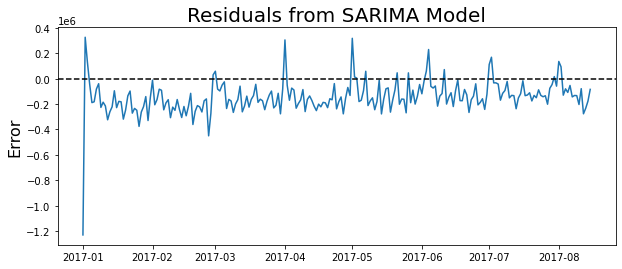

In [252]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

In [254]:
start_date = sales_train.index[0]
end_date = sales_train.index[-1]

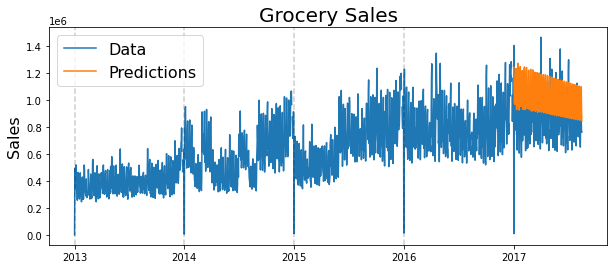

In [255]:
plt.figure(figsize=(10,4))

plt.plot(sales_train)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Grocery Sales', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [256]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [258]:
length = len(test_data)

In [259]:
length

227

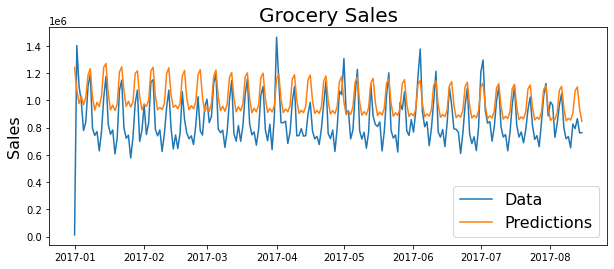

In [260]:
plt.figure(figsize=(10,4))

plt.plot(sales_train[-227:])
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Grocery Sales', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(pred_start_date.year,pred_end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)